In [24]:

# file_name = 'holidaychaos.jpeg'

# # f = open('{0}.csv'.format(name), 'wb')

# # fd_img = open(file_name, 'r')
# # img = Image.open(fd_img)


# # img.crop() is for prior to pillow 3.4.0

# def crop_top_left(height, width, file_name):
#     fd_img = open(file_name, 'r')
#     img = Image.open(fd_img)
#     area = (0,0,height,width)
#     img2 = img.crop (area)
#     img2.save("cropped_top_left.jpeg")
#     fd_img.close()

# # crop_top_left (728, 90, 'holidaychaos.jpeg')
    
# def crop_bottom_right(height, width, file_name):
#     fd_img = open(file_name, 'r')
#     img = Image.open(fd_img)
#     width1 = img.size[0]
#     height2 = img.size[1] 
#     img3 = img.crop(
#         (
#         width1 - width,
#         height2 - height,
#         width1,
#         height2
#         )
#     )
#     img3.save("cropped_bottom_right.jpeg")
#     fd_img.close()
    
# # crop_bottom_right(100,1500,'holidaychaos.jpeg')

# def crop_center (height, width, file_name):
#     fd_img = open(file_name, 'r')
#     img = Image.open(fd_img)
#     half_the_width = img.size[0] / 2
#     half_the_height = img.size[1] / 2
#     img4 = img.crop(
#     (
#         half_the_width - 50,
#         half_the_height - 75,
#         half_the_width + 50,
#         half_the_height + 75
#             )
#         )
#     img4.save("cropped_center.jpeg")
#     fd_img.close()
    
# crop_center (2000,2000,'holidaychaos.jpeg')
    
# def resize (width, height, file_name):
#     fd_img = open(file_name, 'r')
#     img = Image.open(fd_img)
#     img = resizeimage.resize_contain(img, [width, height])
#     img.save('resized_image.jpeg', img.format)
#     fd_img.close()
    
# # resize(728,90,'holidaychaos.jpeg')

In [23]:
from PIL import Image
from resizeimage import resizeimage

In [25]:
file_name = 'holidaychaos.jpeg'

# calculate shrinkage
def calc_scale(old, new):
    return 1.0*new/old

def choose_scale_dim(old_dim, new_dim):
    x_old, y_old = old_dim
    x_new, y_new = new_dim
    
    x_scale = calc_scale(x_old, x_new)
    y_scale = calc_scale(y_old, y_new)

    if x_scale > y_scale:
        return 'x', x_scale
    else:
        return 'y', y_scale
    

def crop_center(width, height, img):    
    x_midpoint = img.size[0] / 2
    y_midpoint = img.size[1] / 2
    
    left = x_midpoint - width/2
    right = x_midpoint + width/2
    upper = y_midpoint - height/2
    lower = y_midpoint + height/2

    return img.crop((left, upper, right, lower))


def resize(width, height, img):
    return resizeimage.resize_contain(img, [int(width), int(height)])

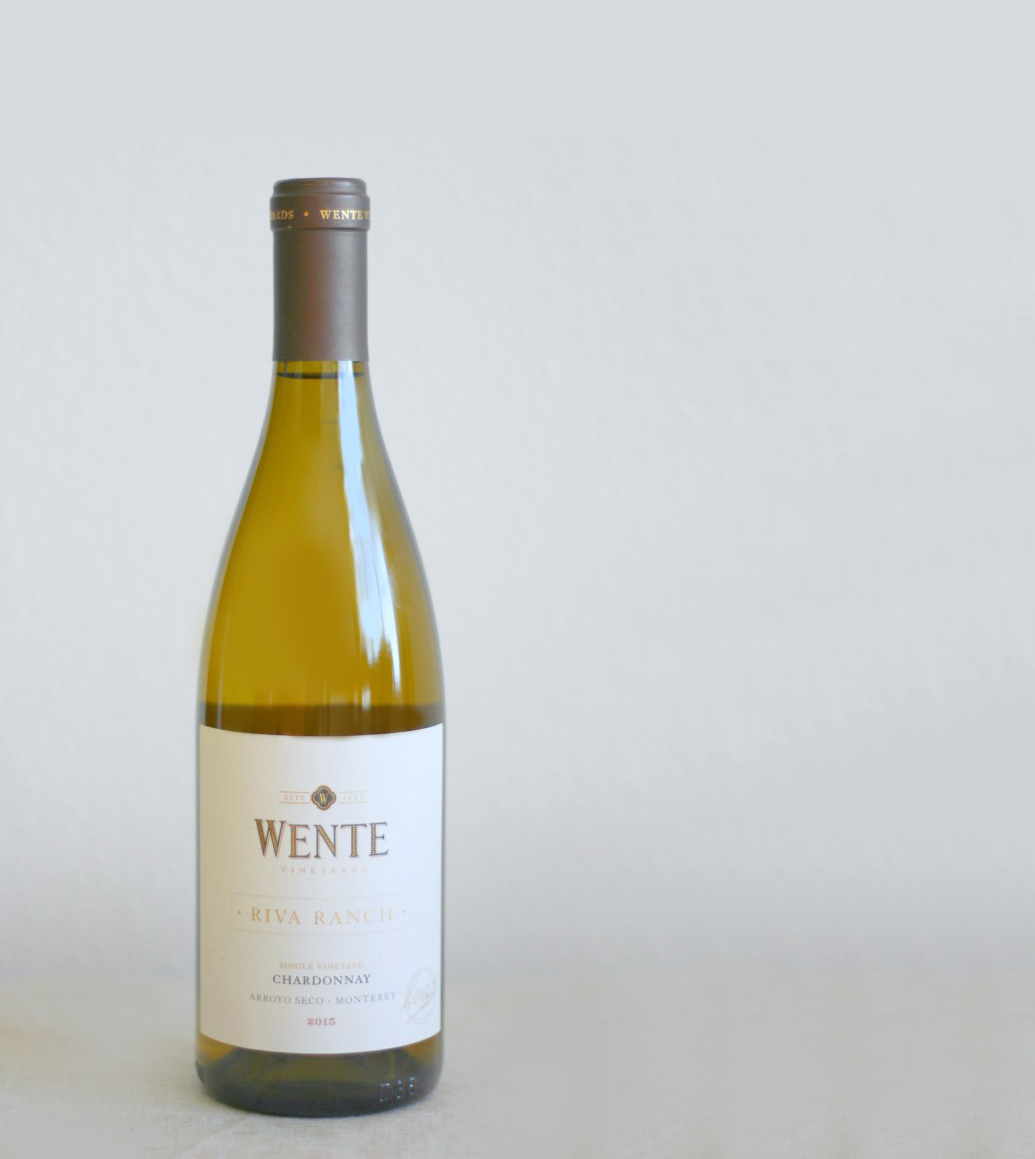

In [3]:
# open image
img = Image.open(file_name)
img

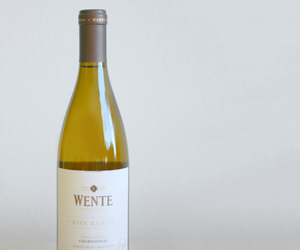

In [34]:
img = Image.open(file_name)

# get old dimensions
old_dim = img.size

# get new dimensions
new_dim = (300,250)

# get dimension and scale
s, scale = choose_scale_dim(old_dim, new_dim)

img = resize(old_dim[0]*scale, old_dim[1]*scale, img)
img = crop_center(new_dim[0], new_dim[1], img)
img




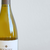

In [29]:
crop_center(50,50,img)

In [18]:
y_shrinkage

0.04314063848144953

In [8]:
import os
files = [f for f in os.listdir('.') if os.path.isfile(f)]


ValueError: need more than 2 values to unpack

In [38]:
import os

def convert(filename, width, height):
    img = Image.open(filename)
    old_dim = img.size                               # get old dimensions
    new_dim = (300,250)                              # get new dimensions
    s, scale = choose_scale_dim(old_dim, new_dim)    # get dimension and scale
    img = resize(old_dim[0]*scale, old_dim[1]*scale, img)
    img = crop_center(new_dim[0], new_dim[1], img)
    
    new_filename = str(width)+'x'+str(height)+'_'+filename
    img.save(new_filename)
    

images = [f for f in os.listdir('.') if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg')]
for img in images:
    convert(img, 300, 250)

In [7]:
b

4